In [1]:
import json
import pandas as pd
import os
from tqdm.notebook import tqdm
DIR = "E3C-Corpus/data_collection/Italian/layer3"

# Elenco dei file nella directory
data_files = os.listdir(DIR)

In [2]:
dfs = []
for filename in tqdm(os.listdir(DIR)):
    authors_string = False
    authors_dict = False
    f = os.path.join(DIR, filename)
    if os.path.isfile(f):
      with open(f, 'r', encoding='utf-8') as fp: # QUESTA è LA RIGA MODIFICATA, VEDI CODICE ORIGINALE VITTORIO PER CAPIRE, QUESTA MODIFICA è STATA NECESSARIA ALTRIMENTI MI DAVA ERRORE (SU COLLAB NO)
        d = json.load(fp)
      if d['authors'] == []:
        d['authors'] = ''
        i = [0]
      elif isinstance(d['authors'], str): #for some Spanish documents (es ES102568.json)
        authors_string = True
        i = [0]
      elif isinstance(d['authors'], dict): #for Basque
        authors_dict = True
        i = [0]
      else:
        i = list(range(len(d['authors'])))
      data = pd.DataFrame(d, index=i)
      if d['authors'] != '':
        try:
          data.authors = pd.DataFrame(data.authors.values.tolist())['author']
        except: #spanish has different format
          if authors_dict:
            data.authors = d['authors']['author']
          elif not authors_string:
            data.authors = pd.DataFrame(data.authors.values.tolist())[1]
        cols = list(data.columns) # columns are different in different languages
        cols.remove('authors')
        data = data.groupby(cols)['authors'].apply(','.join).reset_index()
      dfs.append(data) # append the data frame to the list
df = pd.concat(dfs, ignore_index=True, axis=0) # concatenate all the data frames in the list.

  0%|          | 0/10213 [00:00<?, ?it/s]

In [3]:
import nltk
def filter_words(sentence):
    return [word for word in nltk.word_tokenize(sentence) if word.isalnum()]

def tokenize(text):
    return [filter_words(sentence) for sentence in nltk.sent_tokenize(text.lower())]

documents = []
for i in range(len(df)):
    text = df.loc[i,'text']
    documents.append(text)
    
sentences = []
for doc in documents:
    sentences.extend(tokenize(doc))

In [5]:
print(len(sentences))
len(documents)

398589


10213

In [7]:
import gensim
# create the model and tune it!
word2Vec_model = gensim.models.Word2Vec(
                    sentences, # input sentences
                    sg=0, # use skip grams (0=CBOW). skip grams tend to work better on smaller corpora
                    vector_size=2, # this is how many dimensions the vectors will be
                    min_count=1, # how many times must a word apper
                    window=3
                    )

# Let's save the model to file!
word2Vec_model.save('my_vecs.p')

# let's take a look at some of the methods you can use:
# most similar
#print(word2Vec_model.wv.most_similar('government'))

# calculate similarity (cosine similarity)
# distance will calculate euclidean distance
#print(word2Vec_model.wv.similarity('government', 'president')) 

In [8]:
#word2Vec_model.save('my_vecs.p')
print(word2Vec_model.wv.most_similar('sangue'))

[('leggermente', 1.0), ('serotonin', 1.0), ('allarga', 1.0), ('finalizzati', 1.0), ('sprayhaler', 1.0), ('ascelle', 1.0), ('bisog', 1.0), ('accidentali', 1.0), ('ripristinata', 1.0), ('aggregabilità', 1.0)]


In [9]:
print(word2Vec_model.wv.most_similar_cosmul('uccello'))

[('pentaeritritoltetranitrato', 0.9999990463256836), ('cerume', 0.9999990463256836), ('1sir', 0.999998927116394), ('proseguono', 0.9999986886978149), ('circinato', 0.9999983310699463), ('mud', 0.9999977946281433), ('v03ae01', 0.9999973773956299), ('convul', 0.9999973177909851), ('200xlm', 0.9999967813491821), ('acantociti', 0.9999967813491821)]


In [21]:
print(word2Vec_model.wv.similarity('prostata', 'donna'))

0.8376814


In [25]:
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA non uso ora pca perchè ho dimensionalità gia uguale a due

#my_model = gensim.models.Word2Vec.load('my_vecs.p') non mi serve caricarlo

word_names = word2Vec_model.wv.index_to_key
word_vectors = [word2Vec_model.wv[word] for word in word_names]

#pca = PCA(n_components=2)

#my_pca = pca.fit_transform(my_model[model_vocab])
#vettori = word2Vec_model[model_vocab]
word_names

['di',
 'e',
 'la',
 'in',
 'con',
 'a',
 'per',
 'è',
 'al',
 'del',
 'non',
 'il',
 'essere',
 'o',
 'della',
 'pazienti',
 'un',
 'dose',
 'da',
 'i',
 'mg',
 'sono',
 'una',
 'trattamento',
 'deve',
 'che',
 'farmaco',
 'può',
 'si',
 'ad',
 'nei',
 'vedere',
 'le',
 'compressa',
 'paragrafo',
 'gravidanza',
 'giorno',
 'sito',
 'completa',
 'effetti',
 'vedi',
 'tecnica',
 'alla',
 'rcp',
 'scheda',
 'degli',
 'accedi',
 'farmaci',
 'sulla',
 'somministrazione',
 'altri',
 'medicinali',
 'durante',
 'base',
 'prescrizione',
 'compresse',
 'come',
 'attivo',
 'sovradosaggio',
 'dopo',
 'delle',
 'nel',
 'dati',
 'principio',
 'se',
 'renale',
 'dei',
 'terapia',
 'prima',
 'studi',
 'devono',
 'dosi',
 'soggetti',
 'più',
 'anni',
 'interazioni',
 '2',
 'bambini',
 'caso',
 'sicurezza',
 'prendere',
 'paziente',
 'macchinari',
 'soluzione',
 'posologia',
 'possono',
 '1',
 'proprietà',
 'medica',
 'capacità',
 'guidare',
 'gli',
 'su',
 'ed',
 'equivalenti',
 'sia',
 'italia',
 'du

In [26]:
word_vectors

[array([-1.0967845, -1.4647822], dtype=float32),
 array([-1.1231282, -1.2978474], dtype=float32),
 array([-0.8658602, -1.2867123], dtype=float32),
 array([-0.9533119, -1.5702746], dtype=float32),
 array([-0.12604587, -0.9821633 ], dtype=float32),
 array([ 0.09532111, -0.8646503 ], dtype=float32),
 array([-2.1346312, -1.9429572], dtype=float32),
 array([-0.04832952, -1.174311  ], dtype=float32),
 array([ 2.9363797 , -0.22053432], dtype=float32),
 array([ 2.3800733, -0.3858706], dtype=float32),
 array([-1.8940078, -1.7455099], dtype=float32),
 array([-0.76610506, -1.5979487 ], dtype=float32),
 array([-1.0036875, -1.6550632], dtype=float32),
 array([-0.7691889, -1.1082634], dtype=float32),
 array([-1.9438854, -1.7142648], dtype=float32),
 array([-4.845243, -3.681344], dtype=float32),
 array([-0.36641204, -1.2900176 ], dtype=float32),
 array([-4.7768426, -3.642393 ], dtype=float32),
 array([-2.1360004, -1.8511698], dtype=float32),
 array([-0.5241017, -1.3495624], dtype=float32),
 array([-0

In [27]:
x, y = word_vectors[1]
x,y

first_values = [inner_list[1] for inner_list in word_vectors]
second_values = [inner_list[1] for inner_list in word_vectors]

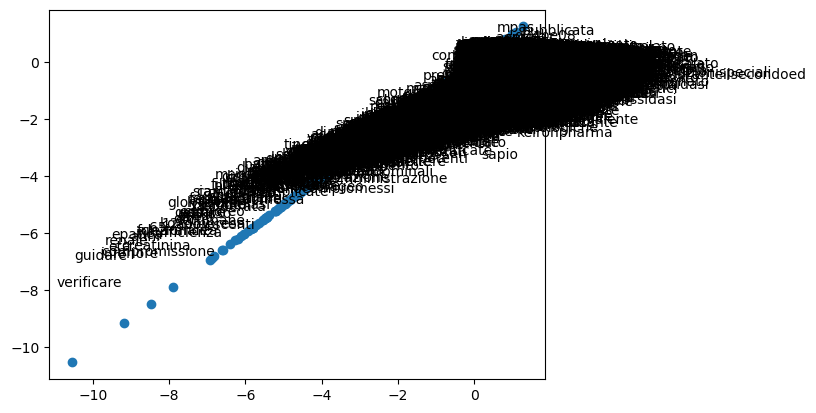

In [28]:
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA non uso ora pca perchè ho dimensionalità gia uguale a due

#my_model = gensim.models.Word2Vec.load('my_vecs.p') non mi serve caricarlo

#pca = PCA(n_components=2)

#my_pca = pca.fit_transform(my_model[model_vocab])


plt.scatter(first_values, second_values)

for i, word in enumerate(word_names):
    x,y = word_vectors[i]
    plt.annotate(word, xy=(x, y))

plt.show()

Provo ora a fare una rappresentazione più fattibile con solo 100 parole

In [29]:
word_names = word_names[0:99]

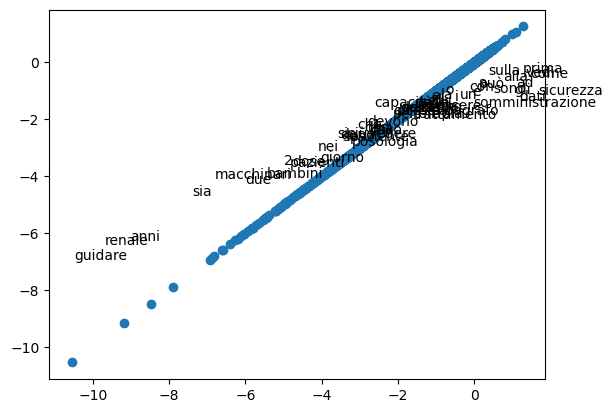

In [30]:

plt.scatter(first_values, second_values)

for i, word in enumerate(word_names):
    x,y = word_vectors[i]
    plt.annotate(word, xy=(x, y))

plt.show()

E proviamo a rappresentarli in maniera più carina:


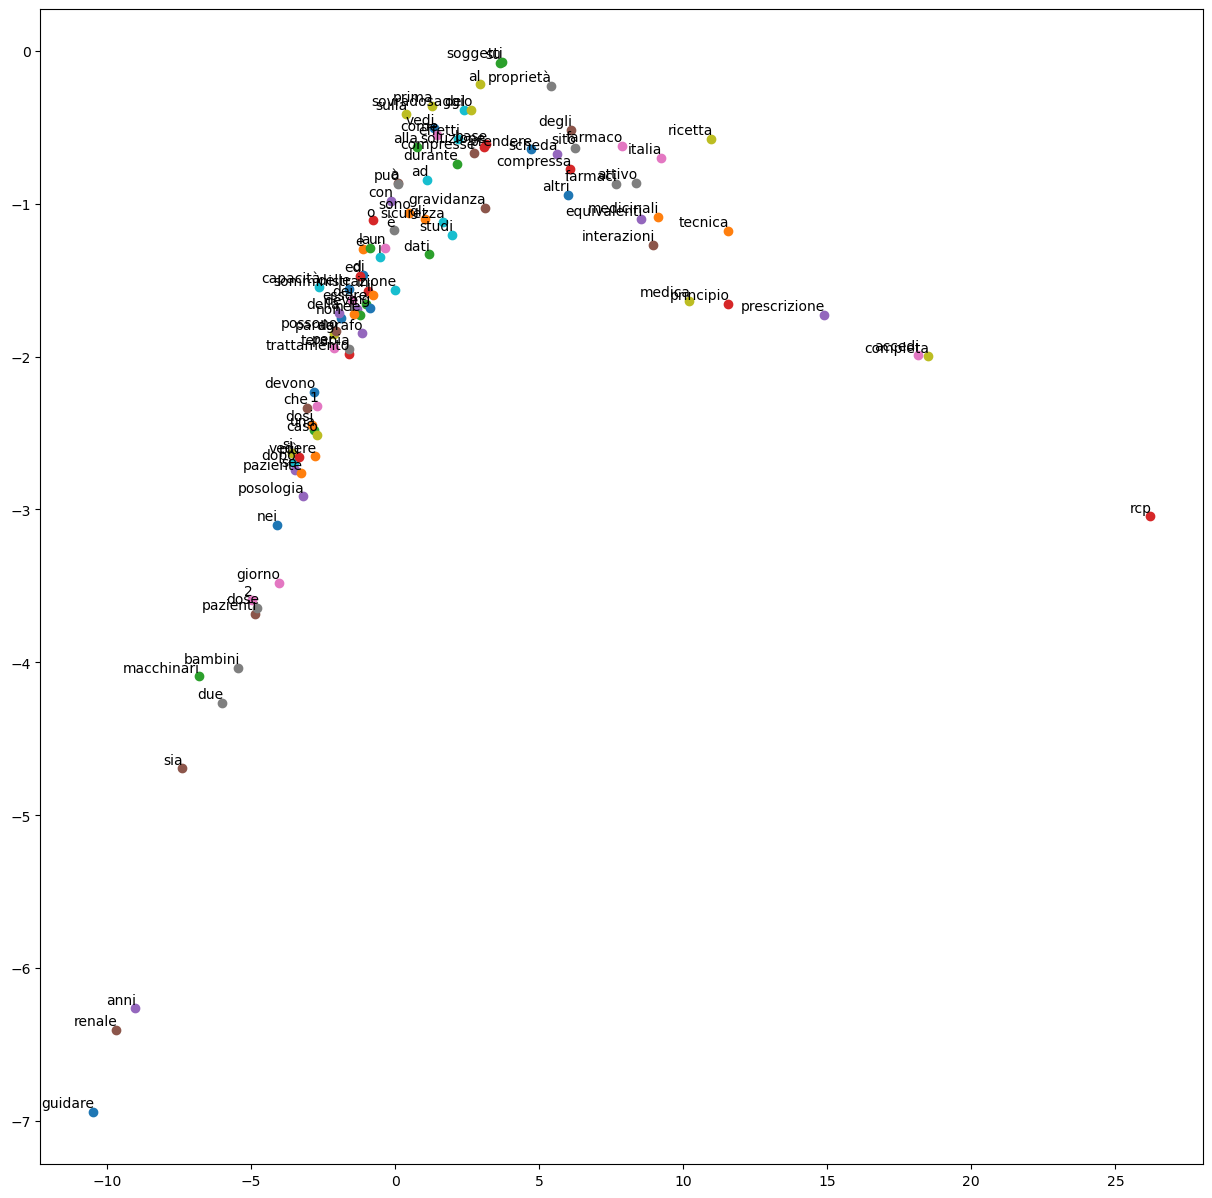

In [36]:



x = []
y = []
for i, word in enumerate(word_names):
    X,Y = word_vectors[i]
    x.append(X)
    y.append(Y)

plt.figure(figsize=(15,15)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(word_names[i],
                 xy=(x[i], y[i]),
                 xytext=(1, 1),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()


Provo ora a rendere il risultato migliore togliendo le parole che non possono essere utili: